# Il numero dei fattori {#sec-number-factors}

**Prerequisiti**

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [2]:
# library(devtools)
# install_github("jmbh/fspe")

here::here("code", "_common.R") |>
    source()

# Load packages
if (!requireNamespace("pacman")) install.packages("pacman")
pacman::p_load(psych, paran, fspe)

## Introduzione

L'analisi fattoriale è un potente strumento statistico che ci permette di semplificare la complessità dei dati, identificando un numero ridotto di **fattori latenti** che spieghino le correlazioni tra un gran numero di variabili osservate. Immaginiamo di avere un questionario con sei aggettivi per misurare la personalità: loquace, assertivo, fantasioso, creativo, estroverso e intellettuale. Ci chiediamo: questi aggettivi misurano un unico tratto della personalità (ad esempio, l'apertura mentale) o più tratti distinti (come estroversione e apertura mentale)?

Determinare il numero ottimale di fattori latenti è un quesito fondamentale nell'analisi fattoriale. Aggiungere più fattori migliora sempre l'adattamento del modello ai dati, ma a scapito della parsimonia. Trovare il giusto equilibrio è cruciale per ottenere una soluzione interpretabile e significativa.

**L'analisi fattoriale esplorativa** (EFA) è la tecnica statistica più utilizzata per affrontare questo problema. L'EFA permette di esplorare i dati e identificare le strutture latenti sottostanti. Tuttavia, la scelta del numero di fattori da estrarre rimane una decisione complessa, che richiede l'utilizzo di criteri statistici e di un'attenta valutazione teorica.

**Metodi per determinare il numero di fattori:**

* **Criteri basati sugli autovalori:** Si basano sull'analisi degli autovalori della matrice di correlazione per identificare i fattori più importanti.
* **Criteri informativi:** Valutano l'adattamento del modello ai dati, penalizzando modelli troppo complessi.
* **Metodi di simulazione:** Confronta i risultati ottenuti con i dati reali con quelli ottenuti da dati simulati.
* **Metodi esplorativi:** Cercano di identificare strutture fattoriali semplici e interpretabili.

La scelta del numero di fattori ha importanti implicazioni per l'interpretazione dei risultati e per le decisioni successive. Un numero di fattori troppo basso può portare a una perdita di informazioni, mentre un numero troppo alto può rendere l'interpretazione difficile e poco parsimoniosa.

In definitiva, la scelta del numero di fattori è un processo iterativo che richiede una combinazione di criteri statistici e considerazioni teoriche. Non esiste una regola ferrea, ma piuttosto una serie di indicatori che, utilizzati congiuntamente, possono guidare il ricercatore verso una soluzione ottimale.

## Tre domande sulla dimensionalità del test

Sono presenti almeno tre questioni rilevanti riguardo la dimensionalità di un test. 

1. **Numero di Dimensioni**: 
   - La prima questione riguarda il numero di dimensioni rifletto dagli item del test. Alcuni test riflettono una sola dimensione, mentre altri ne riflettono due o più. Questa questione è importante poiché ogni dimensione del test è probabile che venga valutata separatamente, necessitando ciascuna una propria analisi psicometrica.

2. **Correlazione tra Dimensioni**:
   - La seconda questione indaga se, in un test con più di una dimensione, queste dimensioni siano correlate tra loro. Alcuni test presentano diverse dimensioni che sono in qualche modo correlate, mentre altri hanno dimensioni essenzialmente indipendenti e non correlate. Questa questione è rilevante, in parte, perché la natura delle associazioni tra le dimensioni di un test ha implicazioni per la significatività del "punteggio totale" del test.

3. **Natura delle Dimensioni**:
   - La terza questione si chiede quali sono le dimensioni in un test con più di una dimensione, ovvero, quali attributi psicologici sono riflessi dalle dimensioni del test? Ad esempio, nel test della personalità con sei aggettivi descritto precedentemente, la prima dimensione riflette l'attributo psicologico dell'estroversione o qualche altro attributo? L'importanza di questa questione è evidente: per valutare ed interpretare efficacemente una dimensione di un test, è necessario comprendere il significato psicologico del punteggio.

## Metodi basati sugli autovalori

Sono stati proposti quattro criteri basati sugli autovalori per determinare il numero $m$ di
fattori da estrarre (Rencher, 2002).

-   Scegliere $m$ tale per cui la varianza spiegata dal modello
    fattoriale superi una soglia predeterminata, per esempio l'80% della
    varianza totale, $tr(\textbf{S})$ o $tr(\textbf{R})$.
-   Scegliere $m$ uguale al numero di autovalori aventi un valore
    maggiore del valore medio degli autovalori. Per **R** il valore
    medio degli autovalori è $1$; per **S** è $\sum_{j=1}^p \theta_j/p$.
-   Usare lo *scree test*.
-   Mediante la statistica $\chi^2$, valutare l'ipotesi che $m$ sia il numero corretto di fattori,
    $H_0: \boldsymbol{\Sigma} =  \boldsymbol{\Lambda}
      \boldsymbol{\Lambda}^{\mathsf{T}} +  \boldsymbol{\Psi}$,
    dove $\boldsymbol{\Lambda}$ è di ordine $p \times m$.

### Quota di varianza spiegata

Il primo criterio si applica soprattutto al metodo delle componenti
principali. La proporzione della varianza capionaria spiegata dal
fattore $j$-esimo estratto da **S** è uguale a

$$\sum_{i=i}^p \hat{\lambda}_{ij}^2 / tr(\textbf{S}).$$ 

Nel caso in cui
i fattori vengano estratti da **R** avremo

$$\sum_{i=i}^p \hat{\lambda}_{ij}^2 / p.$$

Nel caso di fattori incorrelati, ciascun fattore contribuisce con una
quota complessiva di varianza spiegata pari alla somma dei quadrati
delle saturazioni fattoriali contenute nella matrice
$\hat{\boldsymbol{\Lambda}}$:
$\sum_{i=1}^p\sum_{j=1}^m\hat{\lambda}_{ij}^2$. Nel caso del metodo
delle componenti principali, tale somma è anche uguale alla somma dei
primi $m$ autovalori, o alla somma di tutte le $p$ comunalità:

$$\sum_{i=1}^p\sum_{j=1}^m\hat{\lambda}_{ij}^2= \sum_{i=1}^p \hat{h}_i^2
= \sum_{j=1}^m \theta_j$$

Sulla base di queste considerazioni, il numero $m$ di fattori viene
scelto in modo da spiegare una quota sufficientemente grande di **S** o
$p$.

Il numero dei fattori può essere determinato in questo modo anche nel
caso in cui l'analisi fattoriale venga eseguita con il metodo dei
fattori principali (ovvero, nel caso in cui vengano usate le stime delle
comunalità per generare la matrice ridotta $\textbf{S} -
\hat{\boldsymbol{\Psi}}$ o $\textbf{R} - \hat{\boldsymbol{\Psi}}$). In
questo caso, però, è possibile che alcuni autovalori della matrice
$\textbf{S} - \hat{\boldsymbol{\Psi}}$ o $\textbf{R} -
\hat{\boldsymbol{\Psi}}$ assumano valore negativo. In tali circostanze,
è possibile che la proporzione cumulativa della varianza
$\sum_{j=1}^m \theta_j / \sum_{j=1}^p \theta_j$ assuma un valore
maggiore di $1.0$ per $j < p$.

La proporzione cumulativa della varianza si riduce poi a $1.0$ quando
vengono considerati anche i successivi autovalori negativi. Di
conseguenza, può succedere che, utilizzando la matrice
$\textbf{S} - \hat{\boldsymbol{\Psi}}$ o
$\textbf{R} - \hat{\boldsymbol{\Psi}}$, il criterio definito in base
alla quota della varianza spiegata venga raggiunto per un valore $m$
minore di quello che verrebbe trovato utilizzando la matrice **S** o
**R**.

Nel caso del metodo dei fattori principali iterato, $m$ viene
specificato precedentemente a ciascuna iterazione e $\sum_{i}
\hat{h}^2_i$ viene ottenuto dopo ciascuna iterazione calcolando
$\text{tr}(\textbf{S} - \hat{\boldsymbol{\Psi}})$. Per scegliere $m$,
come per il metodo delle componenti principali, possono essere usati gli
autovalori di **S** o **R**.

### Valore medio degli autovalori

Il calcolo del valore medio degli autovalori è una procedura euristica
implementata in molti software. In una variante di tale metodo, $m$
viene scelto in modo tale da uguagliare il numero degli autovalori
positivi della matrice ridotta $\textbf{R} - \hat{\boldsymbol{\Psi}}$ (in tale matrice vi sono solitamente degli autovalori negativi). Tale variante ha però lo svantaggio di produrre
solitamente un numero di fattori troppo grande.

### Scree test

Lo scree test si basa su un grafico che rappresenta gli autovalori di **S** o **R** ordinati in modo decrescente in funzione del numero dei fattori. I punti che rappresentano gli autovalori vengono collegati con una spezzata. Il valore m viene determinato in corrispondenza del fattore oltre il quale il dislivello tra fattori successivi diventa esiguo e la spezzata tende a diventare orizzontale.

### Parallel analysis

La Parallel Analysis si basa sul confronto tra gli autovalori empirici della matrice di correlazione delle variabili originali e quelli generati da un campione casuale di variabili standardizzate. In questo modo si tiene conto delle variazioni dovute agli errori di campionamento. Poiché anche in presenza di variabili incorrelate la matrice di correlazione presenta sempre autovalori maggiori di uno a causa della variabilità campionaria, il confronto tra gli autovalori empirici e quelli generati dalla Parallel Analysis permette di individuare il numero di fattori significativi. Una simulazione di Monte Carlo su una matrice di correlazione di $p=10$ variabili casuali mutuamente indipendenti, ciascuna con $n=20$ osservazioni, può essere utilizzata per illustrare la procedura.

In [3]:
n <- 20
nsim <- 1000
e1 <- rep(0, nsim)
for (i in 1:nsim) {
  Y <- cbind(
    rnorm(n), rnorm(n), rnorm(n), rnorm(n), rnorm(n),
    rnorm(n), rnorm(n), rnorm(n), rnorm(n), rnorm(n)
  )
  e <- eigen(cor(Y))
  e1[i] <- e$values[1]
}
max(e1)

[1] 3.345284

Per i dati di questa simulazione, l'autovalore maggiore ha un valore
pari a $3.35$, anche se i dati sono del tutto casuali. La Parallel
Analysis tiene conto di questo fatto e determina $m$ confrontando gli
autovalori empirici con le loro "controparti casuali." Vanno a
determinare $m$ solo gli autovalori empirici che hanno un valore
superiore ai corrispondenti autovalori generati da una matrice di dati
dello stesso ordine composta da colonne mutualmente incorrelate. Nel caso di questa simulazione di Monte Carlo, se l'autovalore maggiore derivato da una matrice di numeri casuali ha un valore di $3.35$, verranno considerati solo gli autovalori empirici che superano questo valore per determinare il numero di fattori. 

## Metodi basati sul confronto tra modelli

Il confronto tra modelli può essere eseguito usando varie statistiche. Una scelta popolare per stimare il numero di fattori nella EFA è il Criterio d’Informazione Bayesiano (BIC; Schwarz, 1978), introdotto come un miglioramento rispetto al Criterio d’Informazione di Akaike (AIC; Akaike, 1973). Un’alternativa è l’indice RMSEA, che può essere considerato come una stima della mancanza di adattamento che tiene in considerazione i gradi di libertà del modello (Browne e Cudeck, 1992). Un altro metodo di questo tipo è il test Minimum Average Partial (MAP), che stima le correlazioni parziali residue medie per diversi numeri di fattori e seleziona quello con il valore più basso (Velicer, 1976). 

### Test del rapporto di verosimiglianze

In questo test si confrontano due ipotesi: l'ipotesi nulla $H_0$ e l'ipotesi alternativa $H_1$, per valutare la bontà di adattamento di un modello fattoriale a una matrice di covarianza delle variabili oggetto di osservazione campionaria $Y$. L'ipotesi nulla postula che la struttura di interdipendenza di $Y$ può essere spiegata da $m$ fattori comuni, mentre l'alternativa postula che i fattori comuni non sono sufficienti per spiegare la matrice di covarianza $\boldsymbol{\Sigma}$. 

Il test si basa sulla statistica del chi-quadrato con gradi di libertà pari a $\nu = \frac{1}{2}[(p-m)^2-(p-m)]$, dove $p$ è il numero di variabili e $m$ è il numero di fattori. In pratica, si inizia con $m^*=1$ e si valuta l'ipotesi $H_0$ per $m^*$. Se $H_0$ non viene rifiutata, il procedimento si arresta. In caso contrario, si considera $m^*+1$ e si ripete il test finché $H_0$ viene accettata o finché si raggiunge il valore minimo di gradi di libertà pari a zero. 

Il test del rapporto di verosimiglianze è particolarmente indicato quando il numero di osservazioni è grande, ma la sua applicazione è limitata dalle dimensioni del campione. In alternativa, è possibile utilizzare gli indici AIC, BIC e RMSEA per scegliere la soluzione con il valore più piccolo di tali statistiche. Tuttavia, questi indici non forniscono un test statistico per il confronto tra modelli. 

In pratica, si può considerare il valore $m$ indicato dal test come il limite superiore del numero di fattori che sono importanti dal punto di vista pratico.

## Minimizzazione dell'out-of-sample prediction error

Recentemente è stato proposto un nuovo metodo per stimare il numero di fattori in EFA che affronta il problema come un problema di selezione del modello {cite:p}`haslbeck2022estimating`. L’obiettivo è confrontare i modelli con 1, 2, …, p fattori, dove $p$ è il numero di variabili, e selezionare il modello con l’errore di previsione atteso più basso nella popolazione. Tuttavia, questo è un compito non banale perché il modello che minimizza l’errore di previsione nel campione non minimizza sempre l’errore di previsione nella popolazione. 

Intuitivamente, questo problema viene affrontato suddividendo il campione di dati in due insiemi: un set di training e un set di test. Il set di training viene utilizzato per stimare i parametri del modello, le cui previsioni vengono poi verificate utilizzando i dati di test (non utilizzati per la stima dei parametri). Questo calcolo dell’errore di previsione fuori campione viene ripetuto diverse volte, suddividendo ogni volta in modo casuale il campione negli insiemi di training e test. Tale metodo per stimare il numero di fattori è implementato nel pacchetto R `fspe`.

**Esempio.** Per confrontare i metodi discussi per la scelta del numero $m$ di fattori usiamo una matrice di correlazioni calcolata sulle sottoscale della WAIS. Le 11 sottoscale del test sono le seguenti:

- X1 = Information
- X2 = Comprehension
- X3 = Arithmetic
- X4 = Similarities
- X5 = Digit.span
- X6 = Vocabulary
- X7 = Digit.symbol
- X8 = Picture.completion
- X9 = Block.design
- X10 = Picture.arrangement
- X11 = Object.

I dati sono stati ottenuti dal manuale della III edizione.

In [5]:
varnames <- c(
    "IN", "CO", "AR", "SI", "DS", "VO", "SY", "PC",
    "BD", "PA", "OA", "AG", "ED"
)
temp <- matrix(c(
    1, 0.67, 0.62, 0.66, 0.47, 0.81, 0.47, 0.60, 0.49, 0.51, 0.41,
    -0.07, 0.66, .67, 1, 0.54, 0.60, 0.39, 0.72, 0.40, 0.54, 0.45,
    0.49, 0.38, -0.08, 0.52, .62, .54, 1, 0.51, 0.51, 0.58, 0.41,
    0.46, 0.48, 0.43, 0.37, -0.08, 0.49, .66, .60, .51, 1, 0.41,
    0.68, 0.49, 0.56, 0.50, 0.50, 0.41, -0.19, 0.55, .47, .39, .51,
    .41, 1, 0.45, 0.45, 0.42, 0.39, 0.42, 0.31, -0.19, 0.43,
    .81, .72, .58, .68, .45, 1, 0.49, 0.57, 0.46, 0.52, 0.40, -0.02,
    0.62, .47, .40, .41, .49, .45, .49, 1, 0.50, 0.50, 0.52, 0.46,
    -0.46, 0.57, .60, .54, .46, .56, .42, .57, .50, 1, 0.61, 0.59,
    0.51, -0.28, 0.48, .49, .45, .48, .50, .39, .46, .50, .61, 1,
    0.54, 0.59, -0.32, 0.44, .51, .49, .43, .50, .42, .52, .52, .59,
    .54, 1, 0.46, -0.37, 0.49, .41, .38, .37, .41, .31, .40, .46, .51,
    .59, .46, 1, -0.28, 0.40, -.07, -.08, -.08, -.19, -.19, -.02,
    -.46, -.28, -.32, -.37, -.28, 1, -0.29, .66, .52, .49, .55, .43,
    .62, .57, .48, .44, .49, .40, -.29, 1
), nrow = 13, ncol = 13, byrow = TRUE)

colnames(temp) <- varnames
rownames(temp) <- varnames

wais_cor <- temp[1:11, 1:11]
wais_cor

,IN,CO,AR,SI,DS,VO,SY,PC,BD,PA,OA
IN,1.00,0.67,0.62,0.66,0.47,0.81,0.47,0.60,0.49,0.51,0.41
CO,0.67,1.00,0.54,0.60,0.39,0.72,0.40,0.54,0.45,0.49,0.38
AR,0.62,0.54,1.00,0.51,0.51,0.58,0.41,0.46,0.48,0.43,0.37
SI,0.66,0.60,0.51,1.00,0.41,0.68,0.49,0.56,0.50,0.50,0.41
DS,0.47,0.39,0.51,0.41,1.00,0.45,0.45,0.42,0.39,0.42,0.31
VO,0.81,0.72,0.58,0.68,0.45,1.00,0.49,0.57,0.46,0.52,0.40
SY,0.47,0.40,0.41,0.49,0.45,0.49,1.00,0.50,0.50,0.52,0.46
PC,0.60,0.54,0.46,0.56,0.42,0.57,0.50,1.00,0.61,0.59,0.51
BD,0.49,0.45,0.48,0.50,0.39,0.46,0.50,0.61,1.00,0.54,0.59
PA,0.51,0.49,0.43,0.50,0.42,0.52,0.52,0.59,0.54,1.00,0.46


Il primo metodo per la determinazione di $m$ richiede di estrarre tanti fattori quanti sono necessari per spiegare una quota predeterminata della varianza totale. Supponiamo di porre il criterio pari all'80% della varianza totale. 

In [7]:
out <- eigen(wais_cor)
sum(out$val[1:4]) / sum(out$val)
sum(out$val[1:5]) / sum(out$val)

[1] 0.7656781

[1] 0.8118853

La soluzione ottenuta in questo modo ci porterebbe a mantenere $m=5$ fattori.

Il secondo metodo suggerisce di mantenere tutti gli autovalori superiori
al valore medio degli autovalori (che, nel caso di **R** è uguale a
$1$). 

In [8]:
print(round(out$values, 3))

 [1] 6.074 1.015 0.746 0.587 0.508 0.431 0.423 0.377 0.351 0.310 0.177


Nel caso presente, $m=2$.

Lo scree test può essere eseguito creando il grafico seguente.

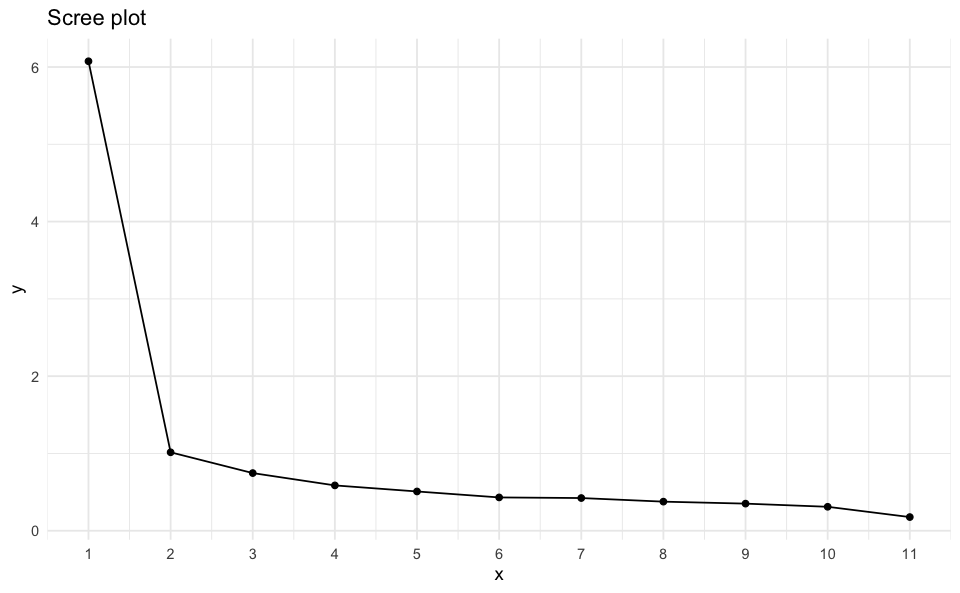

In [9]:
n <- dim(wais_cor)[1]
scree_tb <- tibble(
    x = 1:n,
    y = sort(eigen(wais_cor)$value, decreasing = TRUE)
)

scree_plot <- scree_tb |>
  ggplot(aes(x, y)) +
  geom_point() +
  geom_line() +
  theme_minimal() +
  scale_x_continuous(breaks = 1:n) +
  ggtitle("Scree plot")

scree_plot

Lo scree test suggerisce la presenza di un unico fattore comune. 

La versione della Parallel Analysis può essere eseguita con la funzione `paran()` contenuta nel pacchetto `paran`. 


Using eigendecomposition of correlation matrix.
Computing: 10%  20%  30%  40%  50%  60%  70%  80%  90%  100%


Results of Horn's Parallel Analysis for component retention
330 iterations, using the mean estimate

-------------------------------------------------- 
Component   Adjusted    Unadjusted    Estimated 
            Eigenvalue  Eigenvalue    Bias 
-------------------------------------------------- 
1           1.647667    3.765744      2.118077
-------------------------------------------------- 

Adjusted eigenvalues > 1 indicate dimensions to retain.
(1 components retained)



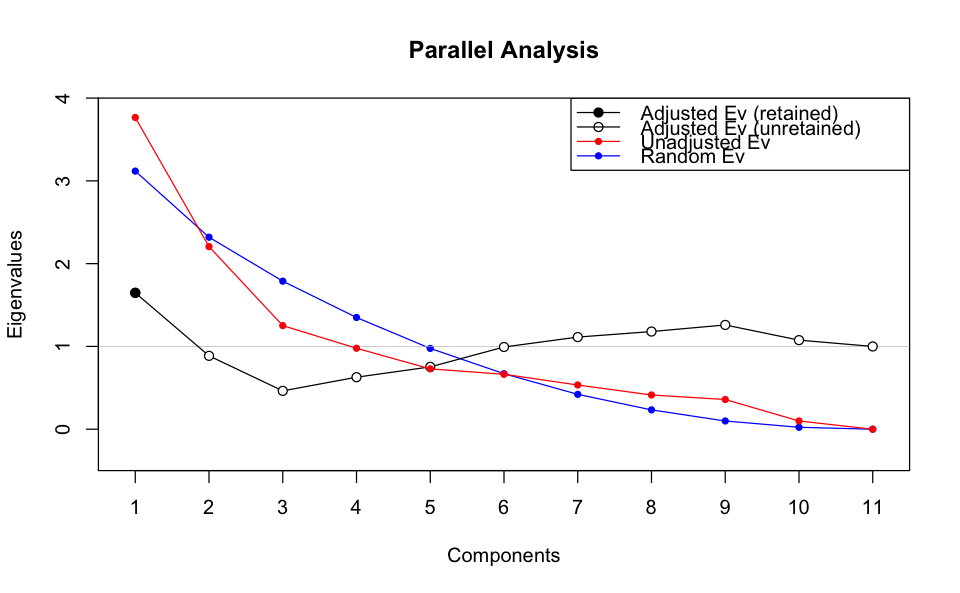

In [10]:
paran(wais_cor, graph = TRUE)

La Parallel Analysis indica una soluzione a $m=1$ fattore.

Il test inferenziale relativo al numero di fattori basato sulla statistica $\chi^2$ può essere eseguito nel modo seguente. 

In [11]:
factanal(covmat=wais_cor, factors=4, n.obs=933)


Call:
factanal(factors = 4, covmat = wais_cor, n.obs = 933)

Uniquenesses:
   IN    CO    AR    SI    DS    VO    SY    PC    BD    PA    OA 
0.229 0.387 0.005 0.416 0.645 0.137 0.005 0.375 0.331 0.492 0.519 

Loadings:
   Factor1 Factor2 Factor3 Factor4
IN 0.758   0.306   0.279   0.157  
CO 0.672   0.312   0.229   0.107  
AR 0.368   0.247   0.886   0.120  
SI 0.602   0.376   0.193   0.207  
DS 0.315   0.288   0.331   0.252  
VO 0.851   0.242   0.208   0.192  
SY 0.238   0.359   0.144   0.888  
PC 0.432   0.623   0.143   0.172  
BD 0.237   0.733   0.217   0.168  
PA 0.367   0.539   0.150   0.245  
OA 0.207   0.620   0.133   0.190  

               Factor1 Factor2 Factor3 Factor4
SS loadings      2.826   2.264   1.233   1.137
Proportion Var   0.257   0.206   0.112   0.103
Cumulative Var   0.257   0.463   0.575   0.678

Test of the hypothesis that 4 factors are sufficient.
The chi square statistic is 35.4 on 17 degrees of freedom.
The p-value is 0.00551 

In [12]:
factanal(covmat = wais_cor, factors = 5, n.obs = 933)


Call:
factanal(factors = 5, covmat = wais_cor, n.obs = 933)

Uniquenesses:
   IN    CO    AR    SI    DS    VO    SY    PC    BD    PA    OA 
0.235 0.389 0.117 0.419 0.600 0.109 0.277 0.308 0.334 0.472 0.456 

Loadings:
   Factor1 Factor2 Factor3 Factor4 Factor5
IN  0.745   0.264   0.301   0.192   0.118 
CO  0.667   0.278   0.244   0.129   0.111 
AR  0.378   0.236   0.814   0.145         
SI  0.591   0.332   0.207   0.252   0.121 
DS  0.288   0.208   0.366   0.341   0.155 
VO  0.865   0.216   0.207   0.229         
SY  0.251   0.364   0.153   0.708         
PC  0.425   0.548   0.156   0.216   0.375 
BD  0.246   0.708   0.230   0.201   0.107 
PA  0.355   0.457   0.163   0.325   0.245 
OA  0.211   0.664   0.128   0.205         

               Factor1 Factor2 Factor3 Factor4 Factor5
SS loadings      2.799   1.986   1.176   1.043   0.280
Proportion Var   0.254   0.181   0.107   0.095   0.025
Cumulative Var   0.254   0.435   0.542   0.637   0.662

Test of the hypothesis that 5 factors are

Il test del $\chi^2$ indica una soluzione a sei fattori.

Per concludere, si potrebbe usare il metodo basato sulla minimizzazione dell'errore di previsione. Tuttavia, non possiamo applicare tale metodo ai dati dell'esempio in quanto sarebbe necessario disporre dei dati grezzi (la matrice di correlazioni non è sufficiente). Allo scopo di illustrare la procedura relativa al metodo basato sulla minimizzazione dell'errore di previsione useremo qui un set di dati diverso, ovvero `holzinger19`.

In [13]:
data(holzinger19)

suppressWarnings(
    fspe_out <- fspe(
        data = holzinger19,
        maxK = 10,
        nfold = 10,
        rep = 10,
        method = "PE"
    )
)

  |                                                                      |   0%

Caricamento dei namespace richiesti: GPArotation



  |----------------------------------------------------------------------| 100%

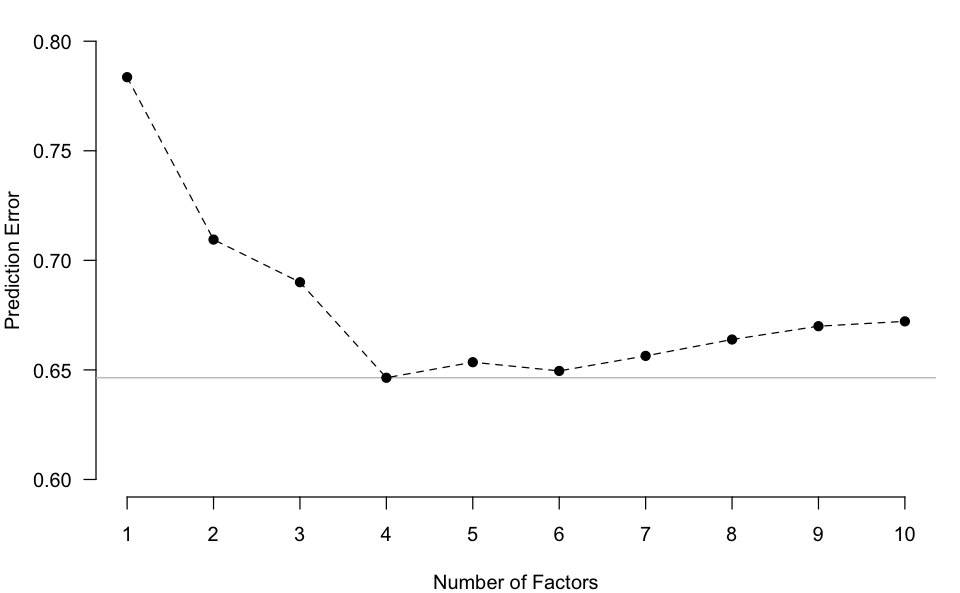

In [14]:
par(mar=c(4,4,1,1))
plot.new()
plot.window(xlim=c(1, 10), ylim=c(.6, .8))
axis(1, 1:10)
axis(2, las=2)
abline(h=min(fspe_out$PEs), col="grey")
lines(fspe_out$PEs, lty=2)
points(fspe_out$PEs, pch=20, cex=1.5)
title(xlab="Number of Factors", ylab="Prediction Error")

Per i dati `holzinger19`, il metodo di {cite:t}`haslbeck2022estimating` produce dunque una soluzione a 4 fattori.

## La replicabilità delle strutture fattoriali

Un aspetto critico dell'analisi fattoriale è la sua capacità di produrre risultati replicabili. Ciò significa che la struttura fattoriale identificata in un campione dovrebbe essere sostanzialmente simile quando replicata in un campione indipendente. Tuttavia, la cross-validazione delle strutture fattoriali spesso presenta difficoltà.

L'Analisi Fattoriale Confirmatoria (CFA) offre una soluzione a questo problema. La CFA permette di testare una struttura fattoriale predefinita in un nuovo campione, verificando se i dati empirici supportano la struttura teorica ipotizzata.

La replicabilità è un indicatore importante della validità di una struttura fattoriale. Essa fornisce evidenze sulla robustezza e sulla generalizzabilità dei risultati ottenuti. Una struttura fattoriale che si replica consistentemente in diversi campioni è più probabile che rifletta una vera struttura sottostante piuttosto che caratteristiche specifiche di un singolo campione.

Ci sono diversi approcci per valutare la replicabilità:

1. Replicazione in campioni indipendenti: Applicare la stessa analisi fattoriale a campioni diversi e confrontare i risultati.

2. Validazione incrociata: Dividere un ampio campione in sottocampioni e confrontare le strutture fattoriali ottenute.

3. CFA: Utilizzare i risultati di un'analisi fattoriale esplorativa come base per un modello confermatorio da testare su nuovi dati.

4. Metodi di ricampionamento: Tecniche come il bootstrap per valutare la stabilità della soluzione fattoriale.

In conclusione, la replicabilità è fondamentale per stabilire la validità e l'utilità di una struttura fattoriale. La CFA, insieme ad altri metodi, rappresenta uno strumento essenziale per valutare la replicabilità e la generalizzabilità dei risultati ottenuti con l'analisi fattoriale. 

## Cosa fare con i fattori

Una volta identificati i fattori attraverso l'analisi fattoriale, sorge la domanda su come utilizzarli efficacemente. Questo aspetto è particolarmente rilevante nel contesto dei Modelli di Equazioni Strutturali (SEM), dove i fattori assumono un significato sostanziale e possono essere impiegati in vari ruoli all'interno del modello.

### Utilizzo dei fattori nei SEM

Nei Modelli di Equazioni Strutturali, i fattori possono essere utilizzati in diversi modi:

1. Predittori: I fattori possono fungere da variabili indipendenti per predire altri costrutti nel modello.
2. Mediatori: Possono essere utilizzati per spiegare il meccanismo attraverso cui una variabile influenza un'altra.
3. Moderatori: Possono essere impiegati per esaminare come la relazione tra due variabili cambia in funzione del livello del fattore moderatore.
4. Esiti: Possono rappresentare le variabili dipendenti del modello, influenzate da altri costrutti.

Un vantaggio significativo dell'utilizzo dei fattori latenti nei SEM è la loro capacità di "disattenuare" le associazioni per l'errore di misurazione. Questo significa che le relazioni stimate tra i costrutti sono più accurate, poiché l'errore di misurazione viene esplicitamente modellato e separato dalla varianza "vera" del costrutto.

### Sfide nell'uso dei fattori al di fuori dei SEM

Quando si cerca di utilizzare i fattori al di fuori del contesto dei SEM, emergono alcune problematiche:

1. Somma o media semplice: Molti ricercatori, dopo aver identificato che tre variabili saturano su un Fattore A, tendono a combinarle semplicemente sommandole o calcolandone la media. Questa pratica, tuttavia, non è accurata poiché ignora i pesi fattoriali (factor loadings) e l'errore di misurazione.

2. Compositi lineari ponderati: Un approccio più sofisticato consiste nel creare un composito lineare, sommando le variabili ponderate per i loro pesi fattoriali. Questo metodo preserva le differenze nelle correlazioni tra le variabili e il fattore, ma continua a ignorare l'errore stimato. Di conseguenza, potrebbe non essere pienamente generalizzabile o significativo.

3. Compositi a pesi unitari: In alcuni casi, assegnare lo stesso peso a tutte le variabili (compositi a pesi unitari) potrebbe risultare più generalizzabile rispetto ai compositi ponderati. Questo perché parte della variabilità nei pesi fattoriali potrebbe riflettere errori di campionamento piuttosto che differenze reali nell'importanza delle variabili. Si noti che il risultato numerico è identico tra la somma semplice e il composito a pesi unitari -- la media semplice differisce solo per una costante (la divisione per il numero di variabili), che non altera le relazioni tra i punteggi. La differenza principale sta nel ragionamento sottostante e nel contesto metodologico: La somma/media semplice è spesso usata senza considerare l'analisi fattoriale. I compositi a pesi unitari sono una scelta consapevole basata sui risultati dell'analisi fattoriale, decidendo di trattare tutte le variabili con uguale importanza.

### Considerazioni aggiuntive

1. Interpretabilità: I fattori latenti nei SEM offrono una rappresentazione più "pura" del costrutto sottostante, ma possono essere meno intuitivi da interpretare rispetto a punteggi compositi.

2. Bilanciamento tra precisione e praticità: Mentre l'uso di fattori latenti nei SEM offre maggiore precisione, in alcuni contesti (ad esempio, nella pratica clinica o nella ricerca applicata) potrebbe essere necessario un compromesso tra precisione statistica e facilità d'uso.

3. Stabilità cross-campione: È importante valutare la stabilità della struttura fattoriale attraverso diversi campioni prima di utilizzare i fattori in analisi successive.

4. Metodi avanzati: Tecniche come la regressione con variabili latenti o l'uso di punteggi fattoriali salvati dai SEM possono offrire un compromesso tra la precisione dei modelli SEM completi e la necessità di punteggi compositi.

In conclusione, mentre i fattori offrono potenti strumenti per la modellazione di costrutti latenti, il loro utilizzo richiede una comprensione approfondita delle loro proprietà statistiche e delle implicazioni delle diverse strategie di operazionalizzazione. La scelta del metodo più appropriato dipenderà dagli obiettivi specifici della ricerca, dal contesto di applicazione e dalle caratteristiche dei dati disponibili.

## Considerazioni conclusive

In generale, la scelta del numero di fattori $m$ non è sempre ovvia e rappresenta un limite dell'analisi fattoriale. Per affrontare questo problema, tradizionalmente si utilizza uno strumento come lo scree test per valutare la proporzione di varianza spiegata di ciascun item e l'interpretabilità della soluzione ottenuta dopo una rotazione adeguata. Tuttavia, poiché la scelta di $m$ è soggettiva, i limiti della soluzione ottenuta sono evidenti. In alcuni casi, la scelta di $m$ può essere più certa quando tutti i metodi forniscono la stessa risposta. Un'alternativa più moderna potrebbe essere l'uso di un metodo basato sulla minimizzazione dell'errore di previsione come quello descritto da {cite:t}`haslbeck2022estimating`. In questo modo, si potrebbe ottenere una soluzione più affidabile e oggettiva.